In [1]:
import importlib
import numpy as np
from numpy import cos, sin, pi, exp, log10, sqrt
import matplotlib.pyplot as plt
import proj_fnc as pf

C:\Users\Sindre S. Olderkjær\Documents\GitHub\ProjectThesis\proj_fnc.py:71: SyntaxWarning: invalid escape sequence '\i'
  error_name = "l^\infty" if errortype=="infty" else "L^1"
C:\Users\Sindre S. Olderkjær\Documents\GitHub\ProjectThesis\proj_fnc.py:79: SyntaxWarning: invalid escape sequence '\D'
  plt.loglog(dxs, 10**(res.intercept + slope*log10(dxs)),label="$\Delta x^{"+str(slope)+"}$",linestyle="--")
C:\Users\Sindre S. Olderkjær\Documents\GitHub\ProjectThesis\proj_fnc.py:85: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("Steplength $\Delta x$")


# Hamilton-Jacobi

## $u(x,t) = \cos(2\pi t)\cos(\pi x)$, $\mu(x,t)=\sin(2\pi xt)$

In [2]:
def u(x,t):
    return cos(2*pi*t)*cos(pi*x)
def ux(x,t):
    return -pi*cos(2*pi*t)*sin(pi*x)
def uxx(x,t):
    return -pi**2*cos(2*pi*t)*cos(pi*x)
def ut(x,t):
    return -2*pi*sin(2*pi*t)*cos(pi*x)
def mu(x,t):
    return sin(2*pi*x*t)+2
def initial(x):
    return u(x,0)
def boundary(t):
    return ux(0,t),ux(1,t)

b_low=0.01
b_high=5
R=pi
t_end=1
def f_low(x,t):
    return -ut(x,t) - ux(x,t)**2 + b_low*uxx(x,t) - mu(x,t)*u(x,t)
def f_high(x,t):
    return -ut(x,t) - ux(x,t)**2 + b_high*uxx(x,t) - mu(x,t)*u(x,t)
    
arguments_low={"b":b_low,"R":R,"t_end":t_end,"f":f_low, "mu":mu, "initial":initial, "boundary":boundary}
arguments_high={"b":b_high,"R":R,"t_end":t_end,"f":f_high, "mu":mu, "initial":initial, "boundary":boundary}

In [3]:
#Simplifies plot titles
u_string = "$\cos(2\pi t)\cos(\pi x)$"
b_low_string = ",   $b="+str(b_low)+"$"
b_high_string = ",   $b="+str(b_high)+"$"

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Sindre S. Olderkjær\AppData\Local\Temp\ipykernel_2592\584027846.py:2: SyntaxWarning: invalid escape sequence '\c'
  u_string = "$\cos(2\pi t)\cos(\pi x)$"


### Testing

In [4]:
%%time
U, div = pf.solve_HJ(100, arguments_low, verbose=3)
U_anal = u(div["x"],t_end)
print("The relative $l^\infty$ error is: {:.2e}".format(pf.calc_rel_error(U[:,-1],U_anal, "infty")))

<unknown>:3: SyntaxWarning: invalid escape sequence '\i'


Approximate memory usage of solution U: 0.571384 MB
Max value:1.0 
Min value:-1.0 
Mean value:0.0174 
Standard deviation:0.493

The relative $l^\infty$ error is: 3.84e-02
CPU times: total: 203 ms
Wall time: 246 ms


<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Sindre S. Olderkjær\AppData\Local\Temp\ipykernel_2592\4169761247.py:4: SyntaxWarning: invalid escape sequence '\c'
  plt.title("$u(x,t)=\cos(2\pi t)\cos(\pi x)$")


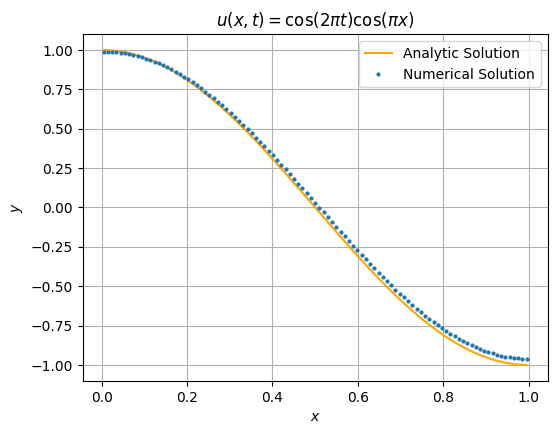

In [5]:
plt.figure(figsize=(6, 4.5))
plt.plot(div["x"], u(div["x"],t_end), linestyle="-", color="orange", label="Analytic Solution")
plt.plot(div["x"], U[:,-1], marker="o", markersize=2, linestyle="", label="Numerical Solution")
plt.title("$u(x,t)=\cos(2\pi t)\cos(\pi x)$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend()
plt.show()

Approximate memory usage of solution U: 0.006992 MB
The relative error is: 4.47e-01
Finished N_x=10

Approximate memory usage of solution U: 0.054192 MB
The relative error is: 1.43e-01
Finished N_x=30

Approximate memory usage of solution U: 0.146192 MB
The relative error is: 8.22e-02
Finished N_x=50

Approximate memory usage of solution U: 0.571384 MB
The relative error is: 3.84e-02
Finished N_x=100

Approximate memory usage of solution U: 2.259368 MB
The relative error is: 1.81e-02
Finished N_x=200

Approximate memory usage of solution U: 8.985736 MB
The relative error is: 8.70e-03
Finished N_x=400

Approximate memory usage of solution U: 55.976048 MB
The relative error is: 3.26e-03
Finished N_x=1000

Numerical convergence rate: 1.1


<Figure size 600x450 with 0 Axes>

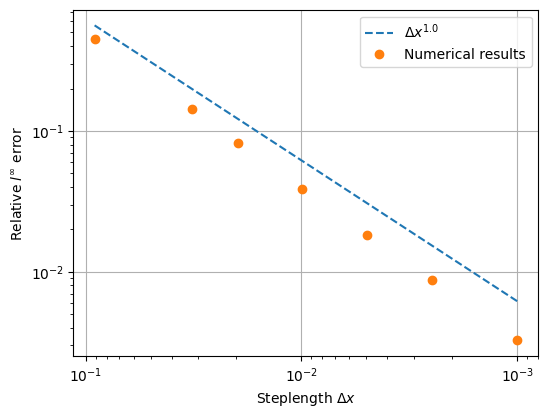

CPU times: total: 8.89 s
Wall time: 10.2 s


In [6]:
%%time
plt.figure(figsize=(6, 4.5))
pf.loglog(pf.solve_HJ,u, [10,30,50,100,200,400,1000], arguments_low, errortype="infty")

### For thesis

<unknown>:3: SyntaxWarning: invalid escape sequence '\i'


Approximate memory usage of solution U: 0.571384 MB
Max value:1.0 
Min value:-1.0 
Mean value:0.0174 
Standard deviation:0.493

The relative $l^\infty$ error is: 3.84e-02


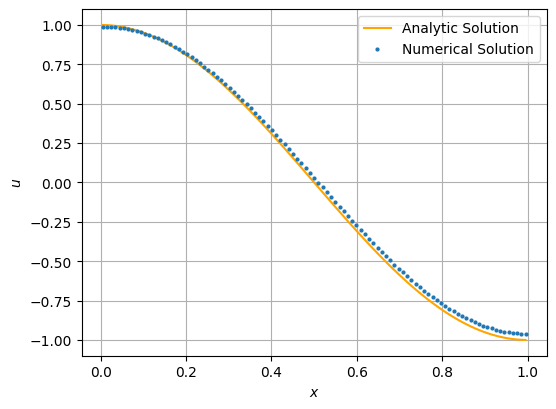

CPU times: total: 578 ms
Wall time: 727 ms


In [7]:
%%time
U, div = pf.solve_HJ(100, arguments_low, verbose=3)
U_anal = u(div["x"],t_end)
print("The relative $l^\infty$ error is: {:.2e}".format(pf.calc_rel_error(U[:,-1],U_anal, "infty")))

plt.figure(figsize=(6, 4.5))
plt.plot(div["x"], u(div["x"],t_end), linestyle="-", color="orange", label="Analytic Solution")
plt.plot(div["x"], U[:,-1], marker="o", markersize=2, linestyle="", label="Numerical Solution")
#plt.title(u_string + b_low_string)
plt.xlabel("$x$")
plt.ylabel("$u$")
plt.grid()
plt.legend()
plt.savefig("Images/HJ_trig_lowb.pdf", format="pdf", bbox_inches="tight")
plt.show()

Approximate memory usage of solution U: 0.571384 MB


<unknown>:3: SyntaxWarning: invalid escape sequence '\i'


Max value:1.01 
Min value:-1.0 
Mean value:0.00599 
Standard deviation:0.497

The relative $l^\infty$ error is: 2.15e-02


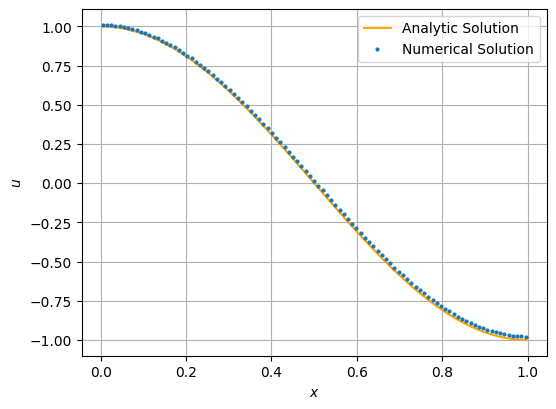

CPU times: total: 1.33 s
Wall time: 1.41 s


In [8]:
%%time
U, div = pf.solve_HJ(100, arguments_high, verbose=3)
U_anal = u(div["x"],t_end)
print("The relative $l^\infty$ error is: {:.2e}".format(pf.calc_rel_error(U[:,-1],U_anal, "infty")))

plt.figure(figsize=(6, 4.5))
plt.plot(div["x"], u(div["x"],t_end), linestyle="-", color="orange", label="Analytic Solution")
plt.plot(div["x"], U[:,-1], marker="o", markersize=2, linestyle="", label="Numerical Solution")
#plt.title(u_string + b_high_string)
plt.xlabel("$x$")
plt.ylabel("$u$")
plt.grid()
plt.legend()
plt.savefig("Images/HJ_trig_highb.pdf", format="pdf", bbox_inches="tight")
plt.show()

Approximate memory usage of solution U: 0.006992 MB
The relative error is: 4.47e-01
Finished N_x=10

Approximate memory usage of solution U: 0.054192 MB
The relative error is: 1.43e-01
Finished N_x=30

Approximate memory usage of solution U: 0.146192 MB
The relative error is: 8.22e-02
Finished N_x=50

Approximate memory usage of solution U: 0.571384 MB
The relative error is: 3.84e-02
Finished N_x=100

Approximate memory usage of solution U: 2.259368 MB
The relative error is: 1.81e-02
Finished N_x=200

Approximate memory usage of solution U: 8.985736 MB
The relative error is: 8.70e-03
Finished N_x=400

Approximate memory usage of solution U: 27.451288 MB
The relative error is: 4.78e-03
Finished N_x=700

Numerical convergence rate: 1.1


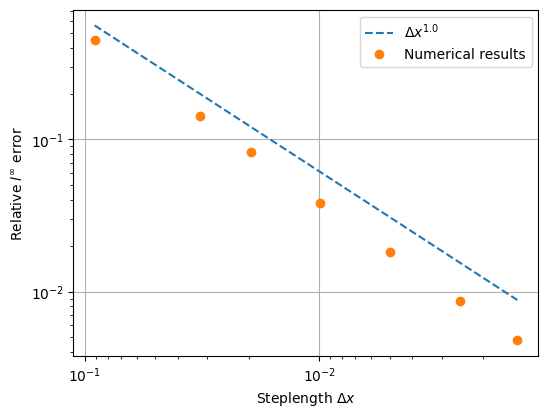

CPU times: total: 6.31 s
Wall time: 6.59 s


In [7]:
%%time
pf.loglog(pf.solve_HJ,u, [10,30,50,100,200,400,700], arguments_low,
          filename="Images/HJ_trig_lowb_loglog.pdf", errortype="infty")

Approximate memory usage of solution U: 0.006992 MB
Finished N_x=10
Approximate memory usage of solution U: 0.054192 MB
Finished N_x=30
Approximate memory usage of solution U: 0.146192 MB
Finished N_x=50
Approximate memory usage of solution U: 0.571384 MB
Finished N_x=100
Approximate memory usage of solution U: 2.259368 MB
Finished N_x=200
Approximate memory usage of solution U: 8.985736 MB
Finished N_x=400
Approximate memory usage of solution U: 55.976048 MB
Finished N_x=1000
Numerical convergence rate: 0.961


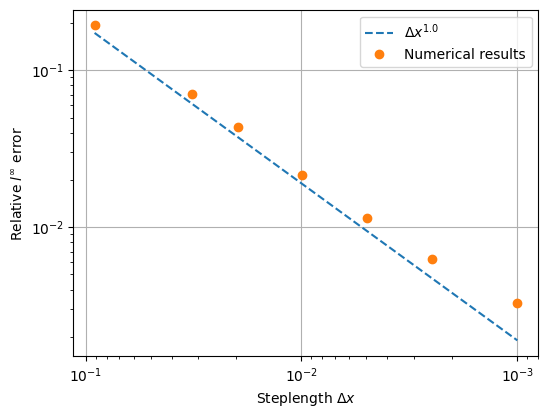

CPU times: total: 43.9 s
Wall time: 1min 37s


In [292]:
%%time
pf.loglog(pf.solve_HJ,u, [10,30,50,100,200,400,1000], arguments_high,
          filename="Images/HJ_trig_highb_loglog.pdf", errortype="infty")

## $u(x,t) = \cos(2\pi t)\cos(\pi x)$, $\mu(x,t)=1$

In [233]:
def u(x,t):
    return cos(2*pi*t)*cos(pi*x)
def ux(x,t):
    return -pi*cos(2*pi*t)*sin(pi*x)
def uxx(x,t):
    return -pi**2*cos(2*pi*t)*cos(pi*x)
def ut(x,t):
    return -2*pi*sin(2*pi*t)*cos(pi*x)
def mu(x,t):
    return 0*x+1
def initial(x):
    return u(x,0)
def boundary(t):
    return ux(0,t),ux(1,t)

b_low=0.01
b_high=5
R=3
t_end=1
def f_low(x,t):
    return -ut(x,t) - ux(x,t)**2 + b_low*uxx(x,t) - mu(x,t)*u(x,t)
def f_high(x,t):
    return -ut(x,t) - ux(x,t)**2 + b_high*uxx(x,t) - mu(x,t)*u(x,t)
    
arguments_low={"b":b_low,"R":R,"t_end":t_end,"f":f_low, "mu":mu, "initial":initial, "boundary":boundary}
arguments_high={"b":b_high,"R":R,"t_end":t_end,"f":f_high, "mu":mu, "initial":initial, "boundary":boundary}

In [234]:
%%time
U, div = pf.solve_HJ(100, arguments_low, verbose=3)
U_anal = u(div["x"],t_end)
print("The relative $l^\infty$ error is: {:.2e}".format(pf.calc_rel_error(U[:,-1],U_anal, "infty")))

Approximate memory usage of solution U: 0.545528 MB
Max value:1.01 
Min value:-1.0 
Mean value:0.021 
Standard deviation:0.495

The relative $l^\infty$ error is: 3.87e-02
CPU times: total: 344 ms
Wall time: 480 ms


In [235]:
%%time
U, div = pf.solve_HJ(100, arguments_high, verbose=3)
U_anal = u(div["x"],t_end)
print("The relative $l^\infty$ error is: {:.2e}".format(pf.calc_rel_error(U[:,-1],U_anal, "infty")))

Approximate memory usage of solution U: 0.545528 MB
Max value:1.01 
Min value:-1.0 
Mean value:0.00828 
Standard deviation:0.497

The relative $l^\infty$ error is: 2.68e-02
CPU times: total: 578 ms
Wall time: 1.17 s


## $u(x,t) = t^{3/2}+x^3$, $\mu(x,t)=\sin(2\pi xt)$

In [323]:
def u(x,t):
    return t**(3/2)+x**3
def ux(x,t):
    return 3*x**2
def uxx(x,t):
    return 6*x
def ut(x,t):
    return 3/2 *np.sqrt(t)
def mu(x,t):
    return sin(2*pi*x*t)+2
def initial(x):
    return u(x,0)
def boundary(t):
    return ux(0,t),ux(1,t)

b_low=0.01
b_high=5
R=3
t_end=1
def f_low(x,t):
    return -ut(x,t) - ux(x,t)**2 + b_low*uxx(x,t) - mu(x,t)*u(x,t)
def f_high(x,t):
    return -ut(x,t) - ux(x,t)**2 + b_high*uxx(x,t) - mu(x,t)*u(x,t)
    
arguments_low={"b":b_low,"R":R,"t_end":t_end,"f":f_low, "mu":mu, "initial":initial, "boundary":boundary}
arguments_high={"b":b_high,"R":R,"t_end":t_end,"f":f_high, "mu":mu, "initial":initial, "boundary":boundary}

In [324]:
u_string = "$u(x,t)=t^{3/2}+x^3$"
b_low_string = ",   $b="+str(b_low)+"$"
b_high_string = ",   $b="+str(b_high)+"$"

### Testing

In [307]:
%%time
U, div = pf.solve_HJ(100, arguments_low, verbose=3)
U_anal = u(div["x"],t_end)
print("The relative $l^\infty$ error is: {:.2e}".format(pf.calc_rel_error(U[:,-1],U_anal, "infty")))

Approximate memory usage of solution U: 0.545528 MB
Max value:2.02 
Min value:1.21e-07 
Mean value:0.664 
Standard deviation:0.42

The relative $l^\infty$ error is: 1.62e-02
CPU times: total: 250 ms
Wall time: 433 ms


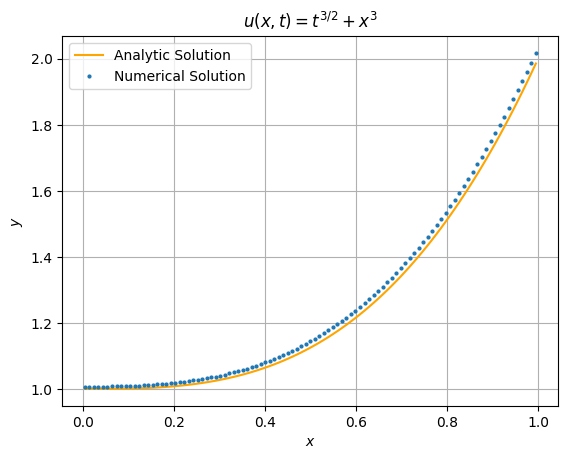

In [308]:
plt.plot(div["x"], u(div["x"],t_end), linestyle="-", color="orange", label="Analytic Solution")
plt.plot(div["x"], U[:,-1], marker="o", markersize=2, linestyle="", label="Numerical Solution")
plt.title("$u(x,t)=t^{3/2}+x^3$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend()
plt.show()

Approximate memory usage of solution U: 0.013152 MB
Finished N_x=10
Approximate memory usage of solution U: 0.103048 MB
Finished N_x=30
Approximate memory usage of solution U: 0.277976 MB
Finished N_x=50
Approximate memory usage of solution U: 1.089312 MB
Finished N_x=100
Approximate memory usage of solution U: 4.311176 MB
Finished N_x=200
Approximate memory usage of solution U: 17.156512 MB
Finished N_x=400
Approximate memory usage of solution U: 52.423712 MB
Finished N_x=700
Numerical convergence rate: 0.963


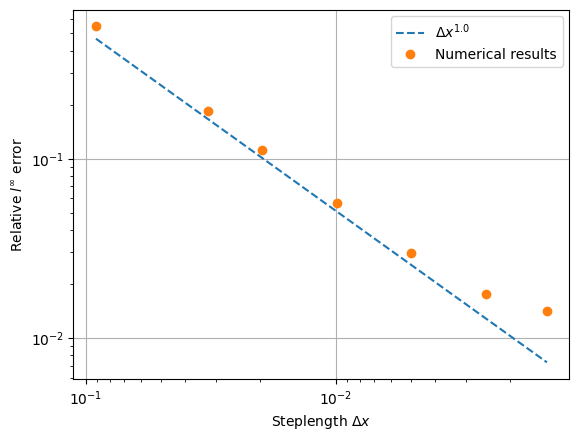

CPU times: total: 2min 13s
Wall time: 4min 54s


In [86]:
%%time
pf.loglog(pf.solve_HJ,u, [10,30,50,100,200,400,700], arguments_low, errortype="infty")

### For Thesis

Approximate memory usage of solution U: 0.545528 MB
Max value:2.02 
Min value:1.21e-07 
Mean value:0.664 
Standard deviation:0.42

The relative $l^\infty$ error is: 1.62e-02


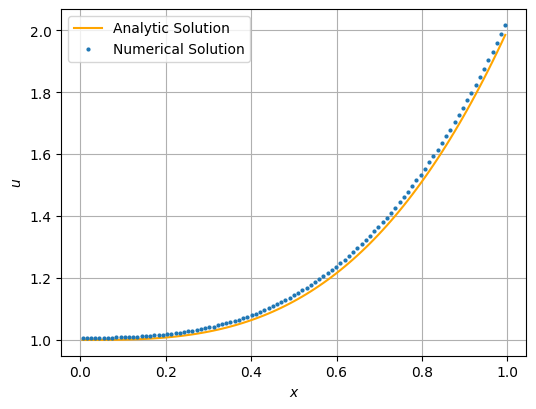

CPU times: total: 672 ms
Wall time: 1.47 s


In [325]:
%%time
U, div = pf.solve_HJ(100, arguments_low, verbose=3)
U_anal = u(div["x"],t_end)
print("The relative $l^\infty$ error is: {:.2e}".format(pf.calc_rel_error(U[:,-1],U_anal, "infty")))

plt.figure(figsize=(6, 4.5))
plt.plot(div["x"], u(div["x"],t_end), linestyle="-", color="orange", label="Analytic Solution")
plt.plot(div["x"], U[:,-1], marker="o", markersize=2, linestyle="", label="Numerical Solution")
#plt.title(u_string+b_low_string)
plt.xlabel("$x$")
plt.ylabel("$u$")
plt.grid()
plt.legend()
plt.savefig("Images/HJ_poly_lowb.pdf", format="pdf", bbox_inches="tight")
plt.show()

Approximate memory usage of solution U: 0.545528 MB
Max value:2.02 
Min value:1.21e-07 
Mean value:0.671 
Standard deviation:0.419

The relative $l^\infty$ error is: 1.76e-02


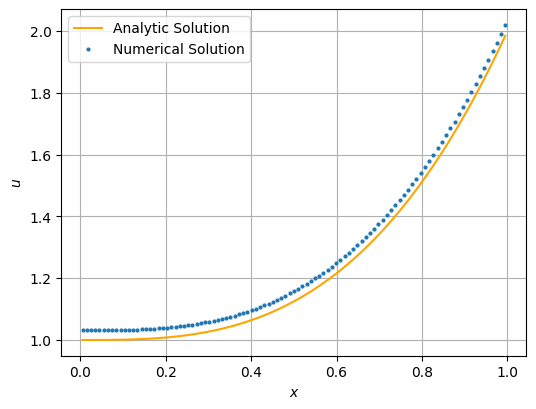

CPU times: total: 2.98 s
Wall time: 8.21 s


In [326]:
%%time
U, div = pf.solve_HJ(100, arguments_high, verbose=3)
U_anal = u(div["x"],t_end)
print("The relative $l^\infty$ error is: {:.2e}".format(pf.calc_rel_error(U[:,-1],U_anal, "infty")))

plt.figure(figsize=(6, 4.5))
plt.plot(div["x"], u(div["x"],t_end), linestyle="-", color="orange", label="Analytic Solution")
plt.plot(div["x"], U[:,-1], marker="o", markersize=2, linestyle="", label="Numerical Solution")
#plt.title(u_string+b_high_string)
plt.xlabel("$x$")
plt.ylabel("$u$")
plt.grid()
plt.legend()
plt.savefig("Images/HJ_poly_highb.pdf", format="pdf", bbox_inches="tight")
plt.show()

Approximate memory usage of solution U: 0.006728 MB
Finished N_x=10
Approximate memory usage of solution U: 0.051712 MB
Finished N_x=30
Approximate memory usage of solution U: 0.139256 MB
Finished N_x=50
Approximate memory usage of solution U: 0.545528 MB
Finished N_x=100
Approximate memory usage of solution U: 2.156456 MB
Finished N_x=200
Approximate memory usage of solution U: 8.581528 MB
Finished N_x=400
Approximate memory usage of solution U: 26.217528 MB
Finished N_x=700
Numerical convergence rate: 0.983


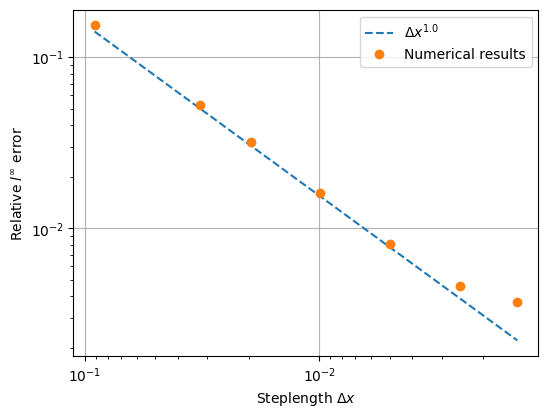

CPU times: total: 9.38 s
Wall time: 18.9 s


In [328]:
%%time
pf.loglog(pf.solve_HJ,u, [10,30,50,100,200,400,700], arguments_low, 
          filename="Images/HJ_poly_lowb_loglog.pdf", errortype="infty")

Approximate memory usage of solution U: 0.006728 MB
Finished N_x=10
Approximate memory usage of solution U: 0.051712 MB
Finished N_x=30
Approximate memory usage of solution U: 0.139256 MB
Finished N_x=50
Approximate memory usage of solution U: 0.545528 MB
Finished N_x=100
Approximate memory usage of solution U: 2.156456 MB
Finished N_x=200
Approximate memory usage of solution U: 8.581528 MB
Finished N_x=400
Approximate memory usage of solution U: 53.453528 MB
Finished N_x=1000
Numerical convergence rate: 1.08


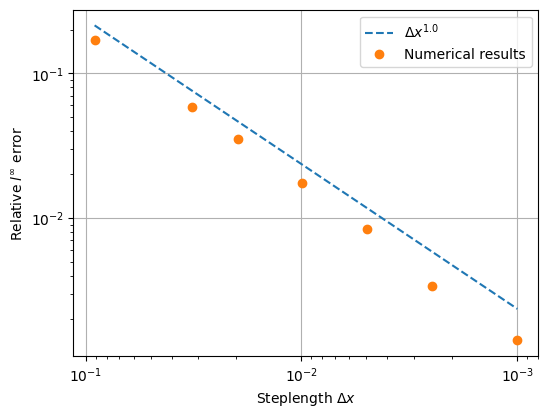

CPU times: total: 1min 29s
Wall time: 3min 28s


In [329]:
%%time
pf.loglog(pf.solve_HJ,u, [10,30,50,100,200,400,1000], arguments_high, 
          filename="Images/HJ_poly_highb_loglog.pdf", errortype="infty")

## $u(x,t) = t^{3/2}+x^3$, $\mu(x,t)=1$

In [193]:
def u(x,t):
    return t**(3/2)+x**3
def ux(x,t):
    return 3*x**2
def uxx(x,t):
    return 6*x
def ut(x,t):
    return 3/2 *np.sqrt(t)
def mu(x,t):
    return 0*x+1
def initial(x):
    return u(x,0)
def boundary(t):
    return ux(0,t),ux(1,t)

b_low=0.01
b_high=5
R=3
t_end=1
def f_low(x,t):
    return -ut(x,t) - ux(x,t)**2 + b_low*uxx(x,t) - mu(x,t)*u(x,t)
def f_high(x,t):
    return -ut(x,t) - ux(x,t)**2 + b_high*uxx(x,t) - mu(x,t)*u(x,t)
    
arguments_low={"b":b_low,"R":R,"t_end":t_end,"f":f_low, "mu":mu, "initial":initial, "boundary":boundary}
arguments_high={"b":b_high,"R":R,"t_end":t_end,"f":f_high, "mu":mu, "initial":initial, "boundary":boundary}

In [198]:
%%time
U, div = pf.solve_HJ(100, arguments_low, verbose=3)
U_anal = u(div["x"],t_end)
print("The relative error is: {:.2e}".format(pf.calc_rel_error(U[:,-1],U_anal, "infty")))

Approximate memory usage of solution U: 0.545528 MB
Max value:2.03 
Min value:1.21e-07 
Mean value:0.669 
Standard deviation:0.422

The relative $l^\infty$ error is: 2.10e-02
CPU times: total: 203 ms
Wall time: 434 ms


In [199]:
%%time
U, div = pf.solve_HJ(100, arguments_high, verbose=3)
U_anal = u(div["x"],t_end)
print("The relative $l^\infty$ error is: {:.2e}".format(pf.calc_rel_error(U[:,-1],U_anal, "infty")))

Approximate memory usage of solution U: 0.545528 MB
Max value:2.04 
Min value:1.21e-07 
Mean value:0.681 
Standard deviation:0.424

The relative $l^\infty$ error is: 2.73e-02
CPU times: total: 1.36 s
Wall time: 4.47 s


# Fokker-Planck

## $m(x,t)=1-\cos(3\pi x)\cos(\pi t)$, $u_x(x,t)=-5x^2 t+5xt$

In [173]:
R=1.5
t_end=1
lamda = 1

def m(x,t):
    return 1-cos(3*pi*x)*cos(pi*t)
def mx(x,t):
    return 3*pi*sin(3*pi*x)*cos(pi*t)
def mxx(x,t):
    return 9*pi**2*cos(3*pi*x)*cos(pi*t)
def mt(x,t):
    return pi*cos(3*pi*x)*sin(pi*t)
def terminal(x):
    return m(x,t_end)

def u(x,t):
    return (-1/3* x**3*t + 1/2 *x**2*t)*5
def ux(x,t):
    return (-x**2*t+x*t)*5
def uxx(x,t):
    return (-2*x*t+t)*5
def boundary_u(t):
    return ux(0,t), ux(1,t)

b_low = 0.01 
b_high= 5
def h_low(x,t):
    return mt(x,t) + 2*m(x,t)*uxx(x,t)+2*mx(x,t)*ux(x,t)+b_low*mxx(x,t)
def h_high(x,t):
    return mt(x,t) + 2*m(x,t)*uxx(x,t)+2*mx(x,t)*ux(x,t)+b_high*mxx(x,t)

arguments_low={"b":b_low, "R":R, "t_end":t_end, "u":u, "h":h_low, "terminal":terminal,"boundary_u":boundary_u, "lamda":lamda}
arguments_high={"b":b_high, "R":R, "t_end":t_end, "u":u, "h":h_high, "terminal":terminal,"boundary_u":boundary_u, "lamda":lamda}

### Testing

In [106]:
%%time
M, div = pf.solve_FP(50, arguments_low, verbose=3)
M_anal = m(div["x"],0)
print("The relative error is: {:.2e}".format(pf.calc_rel_error(M[:,0],M_anal, "L1")))

Approximate memory usage of solution M: 0.021344 MB
Max of central diff approx of u derivative: 1.25
Max value:2.0 
Min value:0.00427 
Mean value:1.0 
Standard deviation:0.503

The relative error is: 2.03e-03
CPU times: total: 109 ms
Wall time: 102 ms


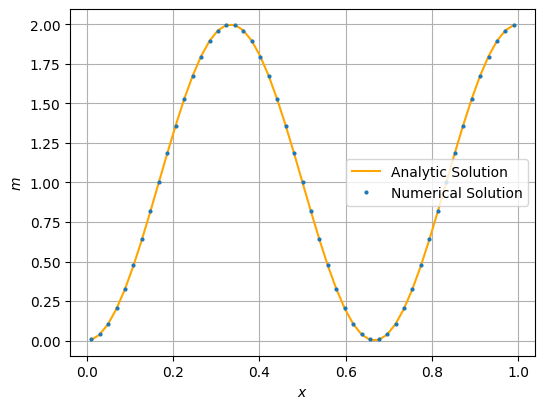

In [107]:
plt.figure(figsize=(6, 4.5))
plt.plot(div["x"], M_anal, linestyle="-", color="orange", label="Analytic Solution")
plt.plot(div["x"], M[:,0], marker="o", markersize=2, linestyle="", label="Numerical Solution")
plt.xlabel("$x$")
plt.ylabel("$m$")
plt.grid()
plt.legend()
plt.show()

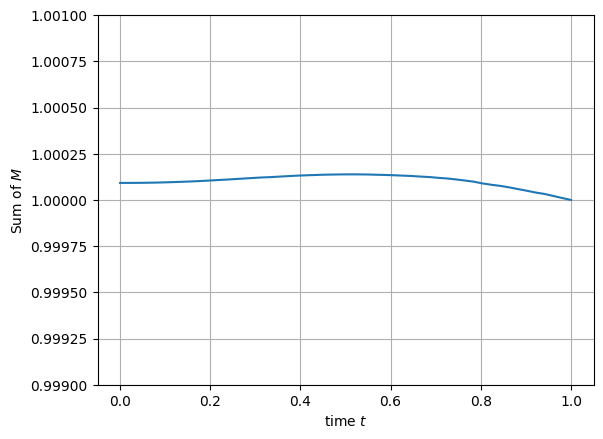

In [108]:
M_mean = [np.mean(np.abs(M[:,i])) for i in range(M.shape[1])]
plt.plot(div["t"], M_mean)
plt.ylim(0.999,1.001)
plt.xlabel("time $t$")
plt.ylabel("Sum of $M$")
plt.grid()
plt.show()

Approximate memory usage of solution M: 0.001184 MB
The relative error is: 1.99e-02
Finished N_x=10

Approximate memory usage of solution M: 0.008064 MB
The relative error is: 1.43e-03
Finished N_x=30

Approximate memory usage of solution M: 0.021344 MB
The relative error is: 2.03e-03
Finished N_x=50

Approximate memory usage of solution M: 0.082544 MB
The relative error is: 1.49e-03
Finished N_x=100

Approximate memory usage of solution M: 0.324944 MB
The relative error is: 8.66e-04
Finished N_x=200

Approximate memory usage of solution M: 1.289744 MB
The relative error is: 4.64e-04
Finished N_x=400

Approximate memory usage of solution M: 8.024144 MB
The relative error is: 2.06e-04
Finished N_x=1000

Numerical convergence rate: 0.845


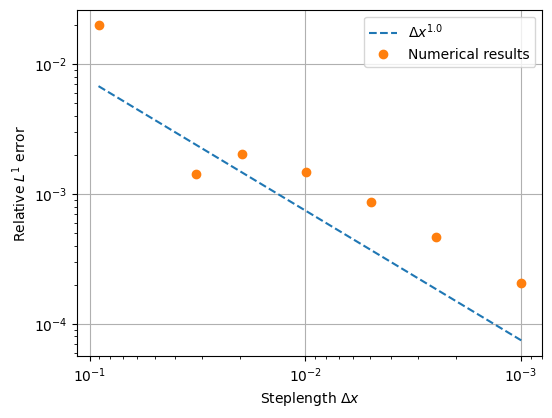

CPU times: total: 25 s
Wall time: 26.1 s


In [110]:
%%time
pf.loglog(pf.solve_FP,m, [10,30,50,100,200,400,1000], arguments_low, first_reg_node=3, errortype="L1")

### For thesis

#### Low b

Approximate memory usage of solution M: 0.021344 MB
Max of central diff approx of u derivative: 1.25
Max value:2.0 
Min value:0.00427 
Mean value:1.0 
Standard deviation:0.413

The relative error is: 2.95e-01


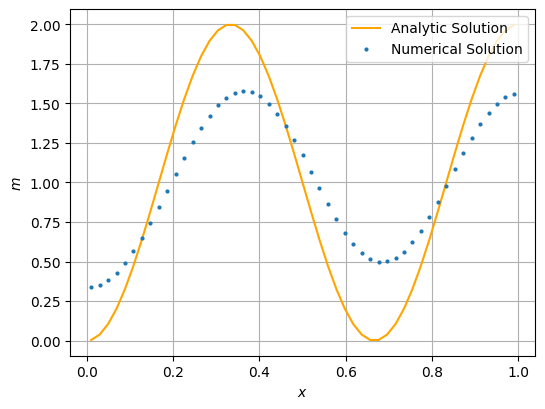

CPU times: total: 281 ms
Wall time: 355 ms


In [174]:
%%time
M, div = pf.solve_FP(50, arguments_low, verbose=3)
M_anal = m(div["x"],0)
print("The relative error is: {:.2e}".format(pf.calc_rel_error(M[:,0],M_anal, "L1")))

plt.figure(figsize=(6, 4.5))
plt.plot(div["x"], m(div["x"],0), linestyle="-", color="orange", label="Analytic Solution")
plt.plot(div["x"], M[:,0], marker="o", markersize=2, linestyle="", label="Numerical Solution")
plt.xlabel("$x$")
plt.ylabel("$m$")
plt.grid()
plt.legend()
plt.savefig("Images/FP_trig_lowb.pdf", format="pdf", bbox_inches="tight")
plt.show()

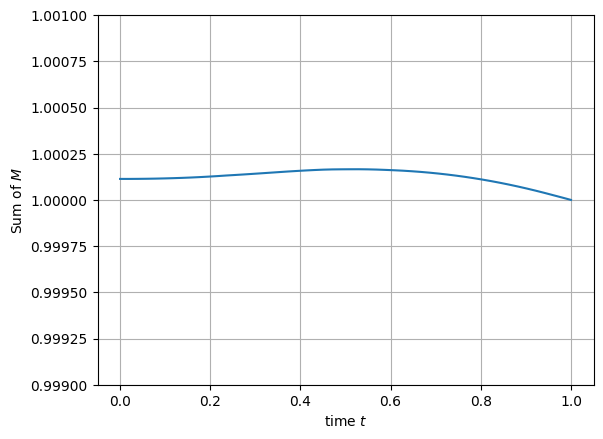

In [175]:
M_mean = [np.mean(np.abs(M[:,i])) for i in range(M.shape[1])]
plt.plot(div["t"], M_mean)
plt.ylim(0.999,1.001)
plt.xlabel("time $t$")
plt.ylabel("Sum of $M$")
plt.grid()
plt.savefig("Images/FP_trig_lowb_conservative.pdf", format="pdf", bbox_inches="tight")
plt.show()

Approximate memory usage of solution M: 0.001184 MB
The relative error is: 5.08e-01
Finished N_x=10

Approximate memory usage of solution M: 0.008064 MB
The relative error is: 3.94e-01
Finished N_x=30

Approximate memory usage of solution M: 0.021344 MB
The relative error is: 2.95e-01
Finished N_x=50

Approximate memory usage of solution M: 0.082544 MB
The relative error is: 1.77e-01
Finished N_x=100

Approximate memory usage of solution M: 0.324944 MB
The relative error is: 9.80e-02
Finished N_x=200

Approximate memory usage of solution M: 1.289744 MB
The relative error is: 5.16e-02
Finished N_x=400

Approximate memory usage of solution M: 8.024144 MB
The relative error is: 2.13e-02
Finished N_x=1000

Numerical convergence rate: 0.8


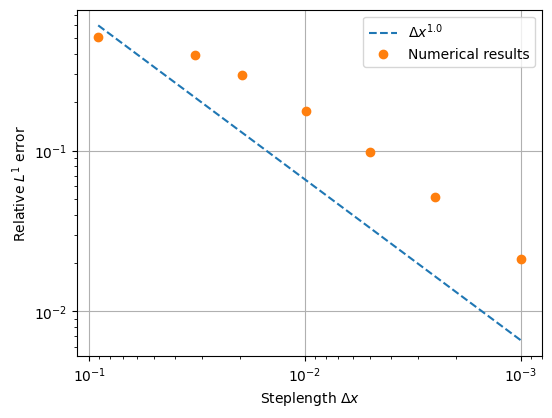

CPU times: total: 2.44 s
Wall time: 2.62 s


In [176]:
%%time
pf.loglog(pf.solve_FP,m, [10,30,50,100,200,400,1000], arguments_low, 
          first_reg_node=1, errortype="L1", filename="Images/FP_trig_lowb_loglog.pdf")

#### High b

Approximate memory usage of solution M: 0.021344 MB
Max of central diff approx of u derivative: 1.25
Max value:2.0 
Min value:0.00427 
Mean value:1.0 
Standard deviation:0.503

The relative error is: 2.03e-03


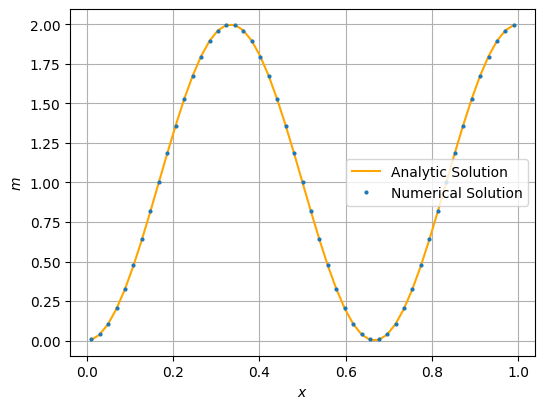

CPU times: total: 516 ms
Wall time: 503 ms


In [177]:
%%time
M, div = pf.solve_FP(50, arguments_high, verbose=3)
M_anal = m(div["x"],0)
print("The relative error is: {:.2e}".format(pf.calc_rel_error(M[:,0],M_anal, "L1")))

plt.figure(figsize=(6, 4.5))
plt.plot(div["x"], m(div["x"],0), linestyle="-", color="orange", label="Analytic Solution")
plt.plot(div["x"], M[:,0], marker="o", markersize=2, linestyle="", label="Numerical Solution")
plt.xlabel("$x$")
plt.ylabel("$m$")
plt.grid()
plt.legend()
plt.savefig("Images/FP_trig_highb.pdf", format="pdf", bbox_inches="tight")
plt.show()

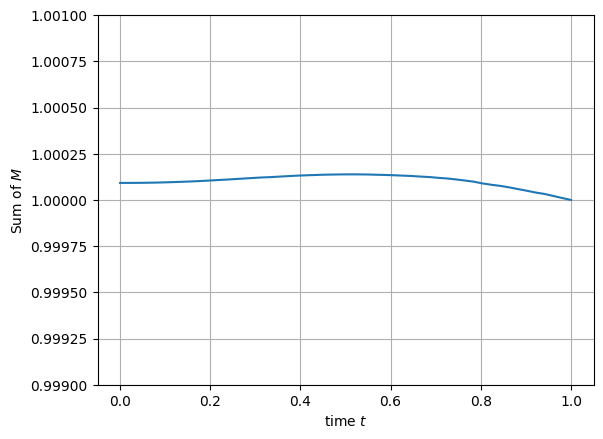

In [178]:
M_mean = [np.mean(np.abs(M[:,i])) for i in range(M.shape[1])]
plt.plot(div["t"], M_mean)
plt.ylim(0.999,1.001)
plt.xlabel("time $t$")
plt.ylabel("Sum of $M$")
plt.grid()
plt.savefig("Images/FP_trig_highb_conservative.pdf", format="pdf", bbox_inches="tight")
plt.show()

Approximate memory usage of solution M: 0.001184 MB
The relative error is: 1.99e-02
Finished N_x=10

Approximate memory usage of solution M: 0.008064 MB
The relative error is: 1.43e-03
Finished N_x=30

Approximate memory usage of solution M: 0.021344 MB
The relative error is: 2.03e-03
Finished N_x=50

Approximate memory usage of solution M: 0.082544 MB
The relative error is: 1.49e-03
Finished N_x=100

Approximate memory usage of solution M: 0.324944 MB
The relative error is: 8.66e-04
Finished N_x=200

Approximate memory usage of solution M: 1.289744 MB
The relative error is: 4.64e-04
Finished N_x=400

Approximate memory usage of solution M: 8.024144 MB
The relative error is: 2.06e-04
Finished N_x=1000

Numerical convergence rate: 0.845


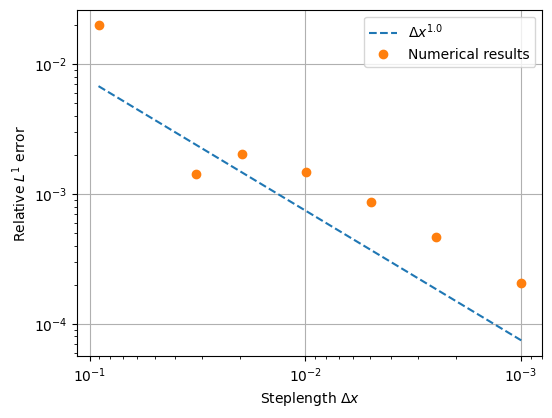

CPU times: total: 24.1 s
Wall time: 26 s


In [180]:
%%time
pf.loglog(pf.solve_FP,m, [10,30,50,100,200,400,1000], arguments_high, 
          first_reg_node=3, errortype="L1",filename="Images/FP_trig_highb_loglog.pdf")

## $m(x,t)=t+(1-t)(-4x^3+6x^2)$, $u_x(x,t)=\sin(2\pi x)(t+1)$

In [152]:
R=2
t_end=1
lamda = 1

def m(x,t):
    return t+(1-t)*(-4*x**3+6*x**2)
def mx(x,t):
    return 12*(1-t)*x*(1-x)
def mxx(x,t):
    return 12*(1-t)*(-2*x+1)
def mt(x,t):
    return 1-(-4*x**3+6*x**2)
def terminal(x):
    return m(x,t_end)

def u(x,t):
    return -1/(2*pi)*cos(2*pi*x)*(t+1)
def ux(x,t):
    return sin(2*pi*x)*(t+1)
def uxx(x,t):
    return 2*pi*cos(2*pi*x)*(t+1)
def boundary_u(t):
    return ux(0,t), ux(1,t)


b_low = 0.01 
b_high= 5
def h_low(x,t):
    return mt(x,t) + 2*m(x,t)*uxx(x,t)+2*mx(x,t)*ux(x,t)+b_low*mxx(x,t)
def h_high(x,t):
    return mt(x,t) + 2*m(x,t)*uxx(x,t)+2*mx(x,t)*ux(x,t)+b_high*mxx(x,t)

arguments_low={"b":b_low, "R":R, "t_end":t_end, "u":u, "h":h_low, "terminal":terminal,"boundary_u":boundary_u, "lamda":lamda}
arguments_high={"b":b_high, "R":R, "t_end":t_end, "u":u, "h":h_high, "terminal":terminal,"boundary_u":boundary_u, "lamda":lamda}

### Testing

In [153]:
%%time
M, div = pf.solve_FP(50, arguments_high, verbose=3)
M_anal = m(div["x"],0)
print("The relative error is: {:.2e}".format(pf.calc_rel_error(M[:,0],M_anal, "L1")))

Approximate memory usage of solution M: 0.021344 MB
Max of central diff approx of u derivative: 1.99
Max value:1.99 
Min value:0.00869 
Mean value:1.0 
Standard deviation:0.401

The relative error is: 4.97e-03
CPU times: total: 78.1 ms
Wall time: 101 ms


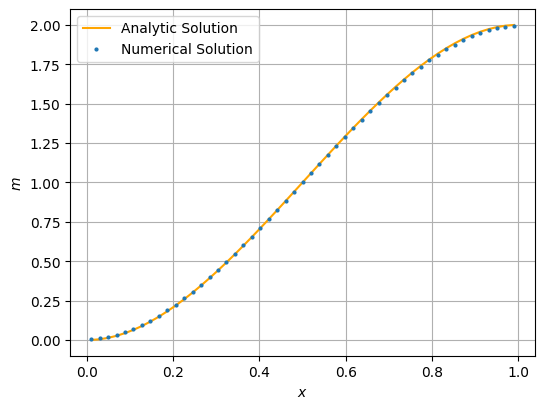

In [154]:
plt.figure(figsize=(6, 4.5))
plt.plot(div["x"], M_anal, linestyle="-", color="orange", label="Analytic Solution")
plt.plot(div["x"], M[:,0], marker="o", markersize=2, linestyle="", label="Numerical Solution")
plt.xlabel("$x$")
plt.ylabel("$m$")
plt.grid()
plt.legend()
plt.show()

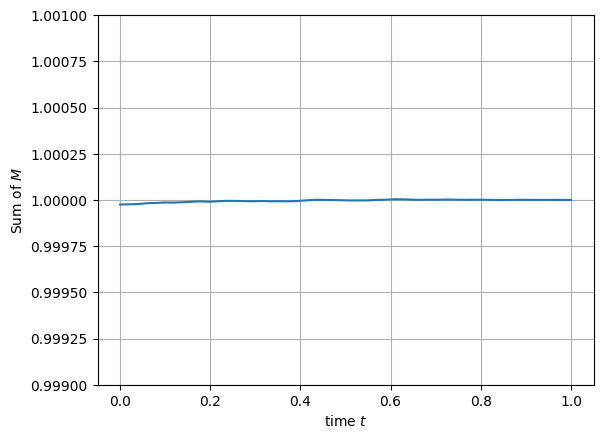

In [141]:
M_mean = [np.mean(np.abs(M[:,i])) for i in range(M.shape[1])]
plt.plot(div["t"], M_mean)
plt.ylim(0.999,1.001)
plt.xlabel("time $t$")
plt.ylabel("Sum of $M$")
plt.grid()
plt.show()

Approximate memory usage of solution M: 0.001184 MB
The relative error is: 1.08e-01
Finished N_x=10

Approximate memory usage of solution M: 0.008064 MB
The relative error is: 4.43e-02
Finished N_x=30

Approximate memory usage of solution M: 0.021344 MB
The relative error is: 2.78e-02
Finished N_x=50

Approximate memory usage of solution M: 0.082544 MB
The relative error is: 1.44e-02
Finished N_x=100

Approximate memory usage of solution M: 0.324944 MB
The relative error is: 7.30e-03
Finished N_x=200

Approximate memory usage of solution M: 1.289744 MB
The relative error is: 3.58e-03
Finished N_x=400

Approximate memory usage of solution M: 8.024144 MB
The relative error is: 1.20e-03
Finished N_x=1000

Numerical convergence rate: 0.982


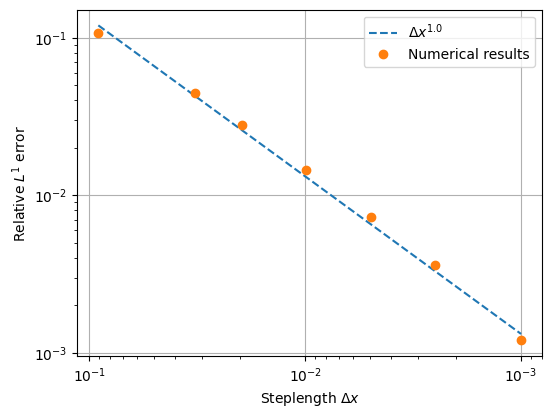

CPU times: total: 10.1 s
Wall time: 10.4 s


In [142]:
%%time
pf.loglog(pf.solve_FP,m, [10,30,50,100,200,400,1000], arguments_low, first_reg_node=1, errortype="L1")

### For thesis

#### Low b

Approximate memory usage of solution M: 0.021344 MB
Max of central diff approx of u derivative: 1.99
Max value:1.81 
Min value:0.193 
Mean value:1.0 
Standard deviation:0.344

The relative error is: 1.04e-01


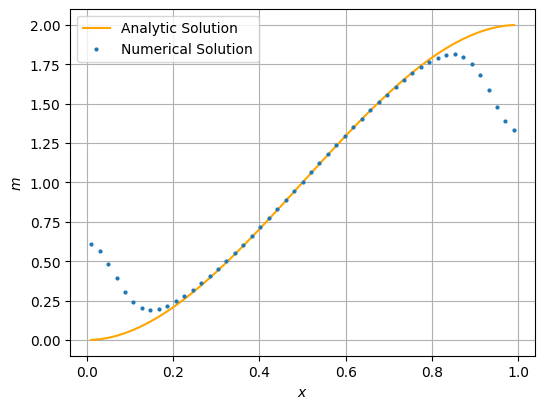

CPU times: total: 312 ms
Wall time: 329 ms


In [170]:
%%time
M, div = pf.solve_FP(50, arguments_low, verbose=3)
M_anal = m(div["x"],0)
print("The relative error is: {:.2e}".format(pf.calc_rel_error(M[:,0],M_anal, "L1")))

plt.figure(figsize=(6, 4.5))
plt.plot(div["x"], m(div["x"],0), linestyle="-", color="orange", label="Analytic Solution")
plt.plot(div["x"], M[:,0], marker="o", markersize=2, linestyle="", label="Numerical Solution")
plt.xlabel("$x$")
plt.ylabel("$m$")
plt.grid()
plt.legend()
plt.savefig("Images/FP_poly_lowb.pdf", format="pdf", bbox_inches="tight")
plt.show()

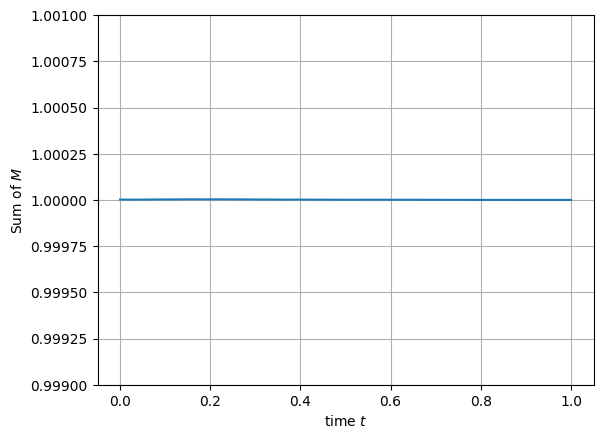

In [171]:
M_mean = [np.mean(np.abs(M[:,i])) for i in range(M.shape[1])]
plt.plot(div["t"], M_mean)
plt.ylim(0.999,1.001)
plt.xlabel("time $t$")
plt.ylabel("Sum of $M$")
plt.grid()
plt.savefig("Images/FP_poly_lowb_conservative.pdf", format="pdf", bbox_inches="tight")
plt.show()

Approximate memory usage of solution M: 0.001184 MB
The relative error is: 4.23e-01
Finished N_x=10

Approximate memory usage of solution M: 0.008064 MB
The relative error is: 1.66e-01
Finished N_x=30

Approximate memory usage of solution M: 0.021344 MB
The relative error is: 1.04e-01
Finished N_x=50

Approximate memory usage of solution M: 0.082544 MB
The relative error is: 5.47e-02
Finished N_x=100

Approximate memory usage of solution M: 0.324944 MB
The relative error is: 2.84e-02
Finished N_x=200

Approximate memory usage of solution M: 1.289744 MB
The relative error is: 1.45e-02
Finished N_x=400

Approximate memory usage of solution M: 8.024144 MB
The relative error is: 5.91e-03
Finished N_x=1000

Numerical convergence rate: 0.95


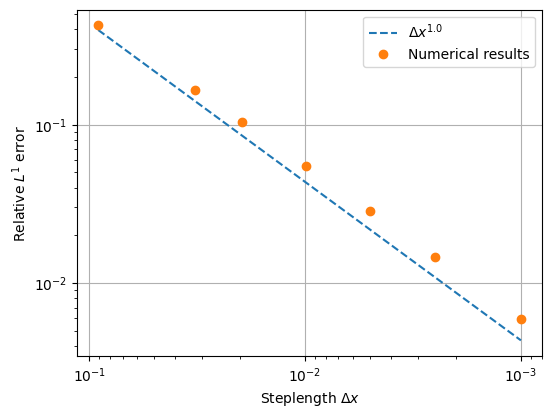

CPU times: total: 2.45 s
Wall time: 2.64 s


In [172]:
%%time
pf.loglog(pf.solve_FP,m, [10,30,50,100,200,400,1000], arguments_low, 
          first_reg_node=1, errortype="L1", filename="Images/FP_poly_lowb_loglog.pdf")

#### High b

Approximate memory usage of solution M: 0.021344 MB
Max of central diff approx of u derivative: 1.99
Max value:1.99 
Min value:0.00869 
Mean value:1.0 
Standard deviation:0.401

The relative error is: 4.97e-03


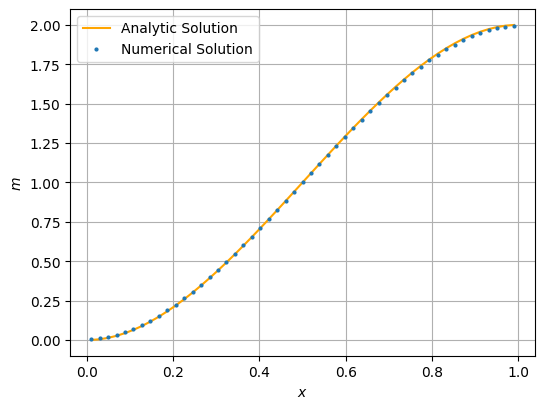

CPU times: total: 359 ms
Wall time: 380 ms


In [164]:
%%time
M, div = pf.solve_FP(50, arguments_high, verbose=3)
M_anal = m(div["x"],0)
print("The relative error is: {:.2e}".format(pf.calc_rel_error(M[:,0],M_anal, "L1")))

plt.figure(figsize=(6, 4.5))
plt.plot(div["x"], m(div["x"],0), linestyle="-", color="orange", label="Analytic Solution")
plt.plot(div["x"], M[:,0], marker="o", markersize=2, linestyle="", label="Numerical Solution")
plt.xlabel("$x$")
plt.ylabel("$m$")
plt.grid()
plt.legend()
plt.savefig("Images/FP_poly_highb.pdf", format="pdf", bbox_inches="tight")
plt.show()

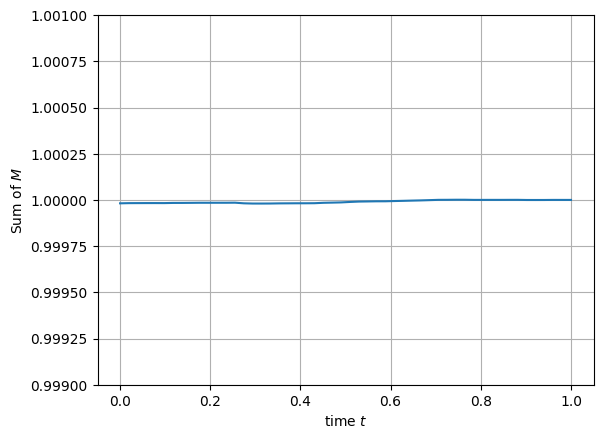

In [165]:
M_mean = [np.mean(np.abs(M[:,i])) for i in range(M.shape[1])]
plt.plot(div["t"], M_mean)
plt.ylim(0.999,1.001)
plt.xlabel("time $t$")
plt.ylabel("Sum of $M$")
plt.grid()
plt.savefig("Images/FP_poly_highb_conservative.pdf", format="pdf", bbox_inches="tight")
plt.show()

Approximate memory usage of solution M: 0.001184 MB
The relative error is: 2.12e-02
Finished N_x=10

Approximate memory usage of solution M: 0.008064 MB
The relative error is: 8.05e-03
Finished N_x=30

Approximate memory usage of solution M: 0.021344 MB
The relative error is: 4.97e-03
Finished N_x=50

Approximate memory usage of solution M: 0.082544 MB
The relative error is: 2.54e-03
Finished N_x=100

Approximate memory usage of solution M: 0.324944 MB
The relative error is: 1.28e-03
Finished N_x=200

Approximate memory usage of solution M: 1.289744 MB
The relative error is: 6.45e-04
Finished N_x=400

Approximate memory usage of solution M: 8.024144 MB
The relative error is: 2.67e-04
Finished N_x=1000

Numerical convergence rate: 0.987


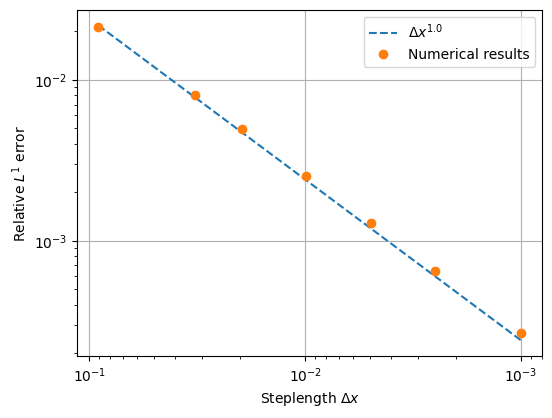

CPU times: total: 27.6 s
Wall time: 29.4 s


In [166]:
%%time
pf.loglog(pf.solve_FP,m, [10,30,50,100,200,400,1000], arguments_high, 
          first_reg_node=1, errortype="L1",filename="Images/FP_poly_highb_loglog.pdf")